In [214]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_squared_error, r2_score


In [215]:
print("Num GPUs avaliable: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Keras Version " + keras.__version__)
print("TF Version " + tf.__version__)
print("Numpy Version " + np.__version__)
print("Pandas Version " + pd.__version__)
print("Matplotlib Version " + matplotlib.__version__)
print("Seaborn Version " + sns.__version__)
print("Scikit Version " + sklearn.__version__)

'''
Num GPUs avaliable:  1
Keras Version 2.3.1
TF Version 2.1.0
Numpy Version 1.19.2
Pandas Version 1.1.3
Matplotlib Version 3.2.2
Seaborn Version 0.11.0
Scikit Version 0.23.2
'''

Num GPUs avaliable:  1
Keras Version 2.3.1
TF Version 2.1.0
Numpy Version 1.19.2
Pandas Version 1.1.3
Matplotlib Version 3.2.2
Seaborn Version 0.11.0
Scikit Version 0.23.2


'\nNum GPUs avaliable:  1\nKeras Version 2.3.1\nTF Version 2.1.0\nNumpy Version 1.19.2\nPandas Version 1.1.3\nMatplotlib Version 3.2.2\nSeaborn Version 0.11.0\nScikit Version 0.23.2\n'

In [216]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11348838924887578709
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3138361755
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7243716412713190058
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [291]:
#Importing the Dataset
dataset = pd.read_csv('2021_10_31_cleaned_lake_dataset_with_tds.csv', header=0, index_col=0)
dataset = dataset.rename(columns={'actual_conductivity':'cond', 'total_dissolved_solids':'tds', 'do_concentration':'do', 'turbidity':'turb', 'chl-a_concentration':'chl-a', 'temperature':'temp'})
dataset = dataset[['temp', 'cond', 'do', 'tds', 'turb', 'chl-a']]
dataset.sort_index()
dataset.head()

,temp,cond,do,tds,turb,chl-a
datetime,,,,,,
2019-02-20 12:00:00,29.55674,92.12651,6.491213,0.055088,32.86783,39.64875
2019-02-20 12:10:00,29.59175,92.22813,6.724226,0.055115,24.30492,40.57396
2019-02-20 12:20:00,29.57693,91.93182,6.677357,0.054952,47.46174,40.88269
2019-02-20 12:30:00,29.63118,92.45161,7.540924,0.055210,55.04100,46.67803
2019-02-20 12:40:00,29.64378,92.78736,7.629431,0.055398,26.58170,47.05107


In [226]:
#Data Preprocessing

#Trying on both trimmed and untrimmed
# trimmed_dataset = dataset[:] #['2019-02-20' : '2019-04-05'] #
# trimmed_dataset.tail()
# print("Trimmed dataset shape: " + str(trimmed_dataset.shape))

# #Ascertain all data is float
# values = trimmed_dataset.values

# values = values.astype('float32')

# #Normalizing Features
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(values)
# # scaled_df = pd.DataFrame(scaled_data)
# # scaled_df.tail()
# print("Scaled dataset shape: " + str(values.shape))

In [292]:
#Data Random Split #TYPE2
dataset_trimmed = dataset[:]#['2019-02-20' : '2019-09-12'] #['2019-02-20' : '2019-03-21']#['2019-03-05' : '2019-09-12']
#Doesn't help
# dataset_trimmed['month'] = (pd.to_datetime(dataset_trimmed.index)).month
# dataset_trimmed['hour'] = (pd.to_datetime(dataset_trimmed.index)).hour
#removing params don't help


train_dataset_rand = dataset_trimmed.sample(frac=0.7) #80% split
test_dataset_rand = dataset_trimmed.drop(train_dataset_rand.index)
train_labels_rand = train_dataset_rand.pop('chl-a')
test_labels_rand = test_dataset_rand.pop('chl-a')


dataset_trimmed.tail()

,temp,cond,do,tds,turb,chl-a
datetime,,,,,,
2019-10-07 14:43:57,28.97082,115.0504,5.775121,0.069511,165.7193,971.7914
2019-10-07 14:58:57,29.59904,120.0654,11.594970,0.071741,188.2978,1027.1150
2019-10-07 17:13:57,29.18500,115.7554,7.265903,0.069672,251.9312,1032.9170
2019-10-08 14:44:46,28.89604,115.3140,6.730115,0.069763,239.6638,1059.8350
2019-10-09 09:00:26,28.61342,114.8307,4.135980,0.069821,258.1431,767.3123


In [293]:
print(train_dataset_rand.shape)
train_dataset_rand.head()

(5961, 5)


,temp,cond,do,tds,turb
datetime,,,,,
2019-03-19 10:33:33,30.61703,96.02863,5.677950,0.056371,257.17960
2019-04-04 11:00:17,28.54843,75.89973,1.536071,0.046203,60.00676
2019-03-15 18:13:32,30.51869,91.92658,10.370770,0.054055,57.66458
2019-03-19 07:43:33,30.74114,95.43124,8.748098,0.055900,210.91410
2019-04-02 12:23:09,30.38274,97.86269,3.723012,0.057681,77.42229


In [294]:
print(test_dataset_rand.shape)
test_dataset_rand.tail()

(2555, 5)


,temp,cond,do,tds,turb
datetime,,,,,
2019-10-07 12:58:57,28.93930,115.3663,5.370367,0.069741,172.7980
2019-10-07 14:13:57,28.97859,115.2137,5.685677,0.069600,194.3924
2019-10-07 14:28:57,28.97616,115.1334,5.698328,0.069554,190.5986
2019-10-07 14:58:57,29.59904,120.0654,11.594970,0.071741,188.2978
2019-10-09 09:00:26,28.61342,114.8307,4.135980,0.069821,258.1431


In [295]:
#Dataset Stats
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,8516.0,30.033648,0.613371,28.474770,29.622605,30.116715,30.463680,31.595630
cond,8516.0,99.561995,8.891243,71.087590,94.474533,98.563085,105.827075,125.575600
do,8516.0,6.139510,2.277367,0.115000,4.388463,6.196976,7.700019,13.116540
tds,8516.0,0.059048,0.005393,0.042957,0.055888,0.058087,0.062871,0.075244
turb,8516.0,82.244682,54.427438,9.632318,42.198635,66.794560,106.602300,272.187000
chl-a,8516.0,276.399605,264.205888,24.960230,60.750943,205.356200,347.067525,1126.180000


In [296]:
#Normalize random data
train_rand_val = train_dataset_rand.values
test_rand_val = test_dataset_rand.values
scaler = MinMaxScaler(feature_range=(-1,1))

scaled_train_rand = scaler.fit_transform(train_rand_val)
scaled_test_rand = scaler.fit_transform(test_rand_val)

print(scaled_train_rand.shape)
print(scaled_test_rand.shape)
print(len(train_dataset_rand.keys()))

(5961, 5)
(2555, 5)
5


In [297]:
print(scaled_train_rand)
print(scaled_test_rand)

[[ 0.37063477 -0.08453107 -0.1435937  -0.16909878  0.88643039]
 [-0.95974018 -0.82336885 -0.78122867 -0.79890855 -0.61612231]
 [ 0.30738954 -0.23509814  0.57885766 -0.3125789  -0.63397086]
 ...
 [ 0.06364396  0.58703575  0.59173543  0.53070548  0.32985987]
 [-0.01206508  0.00319098 -0.86204719 -0.04508198 -0.38242131]
 [-0.10014149 -0.20328894 -0.23168658 -0.24359719 -0.6200083 ]]
[[-0.21056611 -0.19028952  0.30109148 -0.2174475  -0.77997103]
 [-0.22913832 -0.20422968  0.28671912 -0.22966191 -0.84371422]
 [-0.19298661 -0.18942517  0.38959811 -0.21835813 -0.48919382]
 ...
 [-0.67037453  0.79642043 -0.15392825  0.83984742  0.37677296]
 [-0.26087871  1.          0.76331458  0.99275346  0.3591979 ]
 [-0.90884826  0.7839258  -0.39695683  0.85850125  0.89272325]]


In [300]:
# Create model
#, kernel_regularizer=tf.keras.regularizers.l1(0.01), activity_regularizer=tf.keras.regularizers.l2(0.01)
model = Sequential()
model.add(Dense(32, kernel_initializer= 'normal', input_dim=len(train_dataset_rand.keys()), activation="tanh"))#, kernel_regularizer=l2(0.0001), activity_regularizer=l2(0.001)))#, tf.keras.regularizers.l2(1e-4)activity_regularizer=tf.keras.regularizers.l2(1e-5),bias_regularizer=tf.keras.regularizers.l2(1e-4))) ##l2(0.0001) 0.001 poor performance

model.add(Dense(64, kernel_initializer= 'normal', activation="sigmoid"))#, kernel_regularizer=l2(0.0001), activity_regularizer=l2(0.001)))# , activity_regularizer=tf.keras.regularizers.l2(1e-5),bias_regularizer=tf.keras.regularizers.l2(1e-4))) #0.001 poor performance l2(0.0001) tf.keras.regularizers.l1_l2(l1=1e-6, l2=1e-4)

model.add(Dense(8, kernel_initializer= 'normal', activation="tanh"))#, kernel_regularizer=l2(0.0001), activity_regularizer=l2(0.001)))#, activity_regularizer=tf.keras.regularizers.l2(1e-5),bias_regularizer=tf.keras.regularizers.l2(1e-4))) #l2(0.0001) 0.001 poor performance , kernel_regularizer=tf.keras.regularizers.l2(1e-4)


# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(1, activation="linear"))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mae', optimizer= 'adam', metrics=['mae', 'mse']) #Adam(lr=1e-3, decay=1e-3 / 200) 'adam'

# Patient early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 32)                192       
_________________________________________________________________
dense_167 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_168 (Dense)            (None, 8)                 520       
_________________________________________________________________
dense_169 (Dense)            (None, 1)                 9         
Total params: 2,833
Trainable params: 2,833
Non-trainable params: 0
_________________________________________________________________


In [301]:
#Early stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)

# Fit the model
#history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=1000, batch_size=128, verbose=2, shuffle=True, callbacks=[early_stop]) #, callbacks=[es]

#Fit model with rand dataset
history = model.fit(scaled_train_rand, train_labels_rand, validation_data=(scaled_test_rand, test_labels_rand), epochs=10000, batch_size=128, verbose=2, shuffle=True, callbacks=[early_stop])

# # Calculate predictions
# PredTestSet = model.predict(train_X)
# PredValSet = model.predict(test_X)

# # Save predictions
# np.savetxt("trainresults.csv", PredTestSet, delimiter=",")
# np.savetxt("valresults.csv", PredValSet, delimiter=",")



Train on 5961 samples, validate on 2555 samples
Epoch 1/10000
 - 0s - loss: 275.4306 - mae: 275.4307 - mse: 146064.9688 - val_loss: 269.0180 - val_mae: 269.0180 - val_mse: 141241.9062
Epoch 2/10000
 - 0s - loss: 273.3832 - mae: 273.3832 - mse: 144935.4531 - val_loss: 268.1242 - val_mae: 268.1242 - val_mse: 140759.7500
Epoch 3/10000
 - 0s - loss: 272.7141 - mae: 272.7141 - mse: 144567.3281 - val_loss: 267.5781 - val_mae: 267.5781 - val_mse: 140465.5938
Epoch 4/10000
 - 0s - loss: 272.2022 - mae: 272.2022 - mse: 144286.6875 - val_loss: 267.0928 - val_mae: 267.0928 - val_mse: 140205.1094
Epoch 5/10000
 - 0s - loss: 271.7277 - mae: 271.7277 - mse: 144026.9375 - val_loss: 266.6286 - val_mae: 266.6286 - val_mse: 139956.6719
Epoch 6/10000
 - 0s - loss: 271.2687 - mae: 271.2686 - mse: 143777.6562 - val_loss: 266.1751 - val_mae: 266.1751 - val_mse: 139714.6250
Epoch 7/10000
 - 0s - loss: 270.8182 - mae: 270.8181 - mse: 143533.4688 - val_loss: 265.7280 - val_mae: 265.7280 - val_mse: 139476.5469


Epoch 61/10000
 - 0s - loss: 247.7689 - mae: 247.7690 - mse: 131575.5625 - val_loss: 242.6896 - val_mae: 242.6896 - val_mse: 127761.3984
Epoch 62/10000
 - 0s - loss: 247.3467 - mae: 247.3467 - mse: 131366.7500 - val_loss: 242.2671 - val_mae: 242.2671 - val_mse: 127556.3438
Epoch 63/10000
 - 0s - loss: 246.9245 - mae: 246.9245 - mse: 131157.6719 - val_loss: 241.8445 - val_mae: 241.8445 - val_mse: 127351.6094
Epoch 64/10000
 - 0s - loss: 246.5025 - mae: 246.5026 - mse: 130948.6172 - val_loss: 241.4221 - val_mae: 241.4221 - val_mse: 127147.2812
Epoch 65/10000
 - 0s - loss: 246.0807 - mae: 246.0806 - mse: 130740.8125 - val_loss: 240.9998 - val_mae: 240.9998 - val_mse: 126943.3828
Epoch 66/10000
 - 0s - loss: 245.6592 - mae: 245.6592 - mse: 130532.6016 - val_loss: 240.5777 - val_mae: 240.5777 - val_mse: 126739.9922
Epoch 67/10000
 - 0s - loss: 245.2380 - mae: 245.2379 - mse: 130326.6719 - val_loss: 240.1557 - val_mae: 240.1557 - val_mse: 126536.8906
Epoch 68/10000
 - 0s - loss: 244.8168 - m

Epoch 121/10000
 - 0s - loss: 224.7993 - mae: 224.7993 - mse: 120109.2188 - val_loss: 219.7216 - val_mae: 219.7216 - val_mse: 116558.0938
Epoch 122/10000
 - 0s - loss: 224.5501 - mae: 224.5501 - mse: 119953.6719 - val_loss: 219.4772 - val_mae: 219.4772 - val_mse: 116407.2109
Epoch 123/10000
 - 0s - loss: 224.3055 - mae: 224.3055 - mse: 119801.2812 - val_loss: 219.2400 - val_mae: 219.2400 - val_mse: 116258.6953
Epoch 124/10000
 - 0s - loss: 224.0663 - mae: 224.0663 - mse: 119650.3906 - val_loss: 219.0105 - val_mae: 219.0105 - val_mse: 116112.4609
Epoch 125/10000
 - 0s - loss: 223.8352 - mae: 223.8352 - mse: 119501.3125 - val_loss: 218.7840 - val_mae: 218.7841 - val_mse: 115966.2969
Epoch 126/10000
 - 0s - loss: 223.6099 - mae: 223.6099 - mse: 119353.2969 - val_loss: 218.5651 - val_mae: 218.5651 - val_mse: 115822.2188
Epoch 127/10000
 - 0s - loss: 223.3902 - mae: 223.3902 - mse: 119206.5312 - val_loss: 218.3544 - val_mae: 218.3544 - val_mse: 115679.9531
Epoch 128/10000
 - 0s - loss: 223.

Epoch 181/10000
 - 0s - loss: 216.8267 - mae: 216.8268 - mse: 112695.6484 - val_loss: 212.3025 - val_mae: 212.3025 - val_mse: 109333.8516
Epoch 182/10000
 - 0s - loss: 216.6968 - mae: 216.6968 - mse: 112581.1953 - val_loss: 212.0538 - val_mae: 212.0538 - val_mse: 109219.7188
Epoch 183/10000
 - 0s - loss: 216.5198 - mae: 216.5198 - mse: 112463.3828 - val_loss: 211.9614 - val_mae: 211.9614 - val_mse: 109103.6406
Epoch 184/10000
 - 0s - loss: 216.3999 - mae: 216.3999 - mse: 112346.9141 - val_loss: 211.8591 - val_mae: 211.8591 - val_mse: 108989.8047
Epoch 185/10000
 - 0s - loss: 216.2867 - mae: 216.2867 - mse: 112234.8281 - val_loss: 211.7241 - val_mae: 211.7241 - val_mse: 108871.3125
Epoch 186/10000
 - 0s - loss: 216.1139 - mae: 216.1139 - mse: 112107.3828 - val_loss: 211.5109 - val_mae: 211.5109 - val_mse: 108744.8203
Epoch 187/10000
 - 0s - loss: 215.9384 - mae: 215.9384 - mse: 111976.8516 - val_loss: 211.3391 - val_mae: 211.3391 - val_mse: 108614.4219
Epoch 188/10000
 - 0s - loss: 215.

Epoch 241/10000
 - 0s - loss: 209.9843 - mae: 209.9843 - mse: 104521.7266 - val_loss: 205.6141 - val_mae: 205.6141 - val_mse: 101247.8984
Epoch 242/10000
 - 0s - loss: 209.8571 - mae: 209.8571 - mse: 104340.2344 - val_loss: 205.5028 - val_mae: 205.5028 - val_mse: 101096.9062
Epoch 243/10000
 - 0s - loss: 209.7309 - mae: 209.7309 - mse: 104196.0391 - val_loss: 205.5016 - val_mae: 205.5016 - val_mse: 100952.0938
Epoch 244/10000
 - 0s - loss: 209.6243 - mae: 209.6243 - mse: 104040.2422 - val_loss: 205.2667 - val_mae: 205.2667 - val_mse: 100800.9609
Epoch 245/10000
 - 0s - loss: 209.4980 - mae: 209.4980 - mse: 103898.7344 - val_loss: 205.1970 - val_mae: 205.1970 - val_mse: 100656.7812
Epoch 246/10000
 - 0s - loss: 209.3799 - mae: 209.3798 - mse: 103745.4375 - val_loss: 205.0418 - val_mae: 205.0418 - val_mse: 100504.7812
Epoch 247/10000
 - 0s - loss: 209.2594 - mae: 209.2595 - mse: 103588.8359 - val_loss: 204.9312 - val_mae: 204.9312 - val_mse: 100359.0391
Epoch 248/10000
 - 0s - loss: 209.

Epoch 301/10000
 - 0s - loss: 187.7354 - mae: 187.7354 - mse: 94122.8672 - val_loss: 186.9456 - val_mae: 186.9456 - val_mse: 92640.8672
Epoch 302/10000
 - 0s - loss: 187.3995 - mae: 187.3995 - mse: 93922.7422 - val_loss: 186.2691 - val_mae: 186.2691 - val_mse: 92314.8281
Epoch 303/10000
 - 0s - loss: 187.0863 - mae: 187.0863 - mse: 93732.1719 - val_loss: 185.9750 - val_mae: 185.9751 - val_mse: 92123.6172
Epoch 304/10000
 - 0s - loss: 186.7671 - mae: 186.7671 - mse: 93536.0703 - val_loss: 185.8421 - val_mae: 185.8421 - val_mse: 91983.1328
Epoch 305/10000
 - 0s - loss: 186.4707 - mae: 186.4707 - mse: 93343.9219 - val_loss: 185.6602 - val_mae: 185.6602 - val_mse: 91881.3828
Epoch 306/10000
 - 0s - loss: 186.1544 - mae: 186.1544 - mse: 93164.9609 - val_loss: 185.1920 - val_mae: 185.1920 - val_mse: 91610.6484
Epoch 307/10000
 - 0s - loss: 185.8609 - mae: 185.8609 - mse: 92972.3203 - val_loss: 185.3163 - val_mae: 185.3163 - val_mse: 91590.5000
Epoch 308/10000
 - 0s - loss: 185.5888 - mae: 18

Epoch 362/10000
 - 0s - loss: 172.7736 - mae: 172.7736 - mse: 84444.3516 - val_loss: 174.1799 - val_mae: 174.1799 - val_mse: 83807.5781
Epoch 363/10000
 - 0s - loss: 172.5468 - mae: 172.5468 - mse: 84297.6172 - val_loss: 174.3435 - val_mae: 174.3435 - val_mse: 83802.2578
Epoch 364/10000
 - 0s - loss: 172.3222 - mae: 172.3223 - mse: 84158.0156 - val_loss: 174.4548 - val_mae: 174.4548 - val_mse: 83807.0078
Epoch 365/10000
 - 0s - loss: 172.1023 - mae: 172.1023 - mse: 84024.8281 - val_loss: 173.3949 - val_mae: 173.3949 - val_mse: 83335.3750
Epoch 366/10000
 - 0s - loss: 171.8692 - mae: 171.8692 - mse: 83872.6953 - val_loss: 174.0824 - val_mae: 174.0824 - val_mse: 83551.7500
Epoch 367/10000
 - 0s - loss: 171.6582 - mae: 171.6583 - mse: 83748.4062 - val_loss: 173.4668 - val_mae: 173.4668 - val_mse: 83264.2812
Epoch 368/10000
 - 0s - loss: 171.4382 - mae: 171.4382 - mse: 83598.9609 - val_loss: 173.1502 - val_mae: 173.1502 - val_mse: 83104.2344
Epoch 369/10000
 - 0s - loss: 171.2310 - mae: 17

Epoch 423/10000
 - 0s - loss: 160.0606 - mae: 160.0606 - mse: 76355.4922 - val_loss: 163.6367 - val_mae: 163.6367 - val_mse: 76656.1953
Epoch 424/10000
 - 0s - loss: 159.8458 - mae: 159.8458 - mse: 76223.9609 - val_loss: 163.1938 - val_mae: 163.1938 - val_mse: 76423.0234
Epoch 425/10000
 - 0s - loss: 159.6476 - mae: 159.6475 - mse: 76103.2266 - val_loss: 163.5665 - val_mae: 163.5665 - val_mse: 76521.7656
Epoch 426/10000
 - 0s - loss: 159.4592 - mae: 159.4592 - mse: 75987.9688 - val_loss: 162.8433 - val_mae: 162.8433 - val_mse: 76153.3750
Epoch 427/10000
 - 0s - loss: 159.2739 - mae: 159.2739 - mse: 75848.7969 - val_loss: 163.3663 - val_mae: 163.3663 - val_mse: 76361.5156
Epoch 428/10000
 - 0s - loss: 159.0473 - mae: 159.0473 - mse: 75731.6328 - val_loss: 162.8741 - val_mae: 162.8741 - val_mse: 76070.9297
Epoch 429/10000
 - 0s - loss: 158.8559 - mae: 158.8559 - mse: 75593.4141 - val_loss: 163.2043 - val_mae: 163.2043 - val_mse: 76197.3203
Epoch 430/10000
 - 0s - loss: 158.6746 - mae: 15

Epoch 484/10000
 - 0s - loss: 148.0608 - mae: 148.0608 - mse: 69006.0000 - val_loss: 154.6010 - val_mae: 154.6010 - val_mse: 70120.2891
Epoch 485/10000
 - 0s - loss: 147.8879 - mae: 147.8879 - mse: 68881.4609 - val_loss: 154.9928 - val_mae: 154.9928 - val_mse: 70211.6562
Epoch 486/10000
 - 0s - loss: 147.6708 - mae: 147.6708 - mse: 68776.8203 - val_loss: 154.0414 - val_mae: 154.0414 - val_mse: 69797.9922
Epoch 487/10000
 - 0s - loss: 147.5029 - mae: 147.5029 - mse: 68657.2109 - val_loss: 154.3584 - val_mae: 154.3584 - val_mse: 69877.4141
Epoch 488/10000
 - 0s - loss: 147.3055 - mae: 147.3055 - mse: 68547.0938 - val_loss: 153.4371 - val_mae: 153.4371 - val_mse: 69498.5625
Epoch 489/10000
 - 0s - loss: 147.1061 - mae: 147.1061 - mse: 68428.3750 - val_loss: 154.3829 - val_mae: 154.3829 - val_mse: 69796.3672
Epoch 490/10000
 - 0s - loss: 146.9130 - mae: 146.9130 - mse: 68321.1953 - val_loss: 153.9403 - val_mae: 153.9403 - val_mse: 69596.4219
Epoch 491/10000
 - 0s - loss: 146.7348 - mae: 14

Epoch 545/10000
 - 0s - loss: 136.9433 - mae: 136.9433 - mse: 62406.2852 - val_loss: 147.4837 - val_mae: 147.4837 - val_mse: 64654.5391
Epoch 546/10000
 - 0s - loss: 136.7789 - mae: 136.7789 - mse: 62312.6758 - val_loss: 146.3182 - val_mae: 146.3182 - val_mse: 64159.8008
Epoch 547/10000
 - 0s - loss: 136.6155 - mae: 136.6155 - mse: 62215.0391 - val_loss: 146.3236 - val_mae: 146.3236 - val_mse: 64119.7852
Epoch 548/10000
 - 0s - loss: 136.4498 - mae: 136.4498 - mse: 62111.0352 - val_loss: 146.1000 - val_mae: 146.1000 - val_mse: 64003.2695
Epoch 549/10000
 - 0s - loss: 136.2576 - mae: 136.2576 - mse: 62009.2305 - val_loss: 145.5745 - val_mae: 145.5745 - val_mse: 63768.3594
Epoch 550/10000
 - 0s - loss: 136.0926 - mae: 136.0926 - mse: 61912.2383 - val_loss: 145.9643 - val_mae: 145.9642 - val_mse: 63868.0547
Epoch 551/10000
 - 0s - loss: 135.9243 - mae: 135.9243 - mse: 61804.3789 - val_loss: 145.5386 - val_mae: 145.5386 - val_mse: 63662.9023
Epoch 552/10000
 - 0s - loss: 135.7726 - mae: 13

Epoch 606/10000
 - 0s - loss: 126.9616 - mae: 126.9616 - mse: 56561.6836 - val_loss: 139.3945 - val_mae: 139.3946 - val_mse: 59114.8320
Epoch 607/10000
 - 0s - loss: 126.7912 - mae: 126.7912 - mse: 56476.0742 - val_loss: 139.1528 - val_mae: 139.1528 - val_mse: 58964.2539
Epoch 608/10000
 - 0s - loss: 126.6112 - mae: 126.6112 - mse: 56380.3125 - val_loss: 138.4103 - val_mae: 138.4103 - val_mse: 58648.4961
Epoch 609/10000
 - 0s - loss: 126.4594 - mae: 126.4594 - mse: 56287.3516 - val_loss: 138.6636 - val_mae: 138.6637 - val_mse: 58670.8398
Epoch 610/10000
 - 0s - loss: 126.3230 - mae: 126.3230 - mse: 56195.4531 - val_loss: 139.2661 - val_mae: 139.2661 - val_mse: 58851.6328
Epoch 611/10000
 - 0s - loss: 126.2038 - mae: 126.2038 - mse: 56125.7188 - val_loss: 138.6851 - val_mae: 138.6851 - val_mse: 58576.7461
Epoch 612/10000
 - 0s - loss: 126.0161 - mae: 126.0161 - mse: 56025.2969 - val_loss: 137.9832 - val_mae: 137.9832 - val_mse: 58330.7539
Epoch 613/10000
 - 0s - loss: 125.8493 - mae: 12

Epoch 667/10000
 - 0s - loss: 118.4292 - mae: 118.4292 - mse: 51483.5156 - val_loss: 132.6207 - val_mae: 132.6207 - val_mse: 54149.0586
Epoch 668/10000
 - 0s - loss: 118.3081 - mae: 118.3081 - mse: 51400.1875 - val_loss: 134.1839 - val_mae: 134.1839 - val_mse: 54587.7930
Epoch 669/10000
 - 0s - loss: 118.1540 - mae: 118.1540 - mse: 51323.5391 - val_loss: 132.3234 - val_mae: 132.3234 - val_mse: 53970.4805
Epoch 670/10000
 - 0s - loss: 118.0744 - mae: 118.0744 - mse: 51250.5039 - val_loss: 133.0685 - val_mae: 133.0685 - val_mse: 54145.7266
Epoch 671/10000
 - 0s - loss: 117.9077 - mae: 117.9077 - mse: 51171.1445 - val_loss: 132.7220 - val_mae: 132.7220 - val_mse: 54000.9336
Epoch 672/10000
 - 0s - loss: 117.7654 - mae: 117.7654 - mse: 51096.1836 - val_loss: 132.5272 - val_mae: 132.5272 - val_mse: 53900.0859
Epoch 673/10000
 - 0s - loss: 117.6282 - mae: 117.6282 - mse: 51017.9844 - val_loss: 132.5843 - val_mae: 132.5843 - val_mse: 53867.5977
Epoch 674/10000
 - 0s - loss: 117.5349 - mae: 11

Epoch 728/10000
 - 0s - loss: 111.9068 - mae: 111.9068 - mse: 47224.1250 - val_loss: 129.7052 - val_mae: 129.7052 - val_mse: 50662.6992
Epoch 729/10000
 - 0s - loss: 111.8015 - mae: 111.8015 - mse: 47167.3711 - val_loss: 127.8454 - val_mae: 127.8454 - val_mse: 50048.6797
Epoch 730/10000
 - 0s - loss: 111.7757 - mae: 111.7757 - mse: 47104.7930 - val_loss: 129.0046 - val_mae: 129.0046 - val_mse: 50374.2734
Epoch 731/10000
 - 0s - loss: 111.6516 - mae: 111.6516 - mse: 47049.3125 - val_loss: 128.5864 - val_mae: 128.5864 - val_mse: 50200.7656
Epoch 732/10000
 - 0s - loss: 111.5526 - mae: 111.5527 - mse: 46979.3125 - val_loss: 129.6357 - val_mae: 129.6357 - val_mse: 50475.9414
Epoch 733/10000
 - 0s - loss: 111.5504 - mae: 111.5504 - mse: 46925.9531 - val_loss: 130.3040 - val_mae: 130.3040 - val_mse: 50687.3320
Epoch 734/10000
 - 0s - loss: 111.4356 - mae: 111.4356 - mse: 46867.7188 - val_loss: 129.4529 - val_mae: 129.4529 - val_mse: 50353.6328
Epoch 735/10000
 - 0s - loss: 111.3150 - mae: 11

Epoch 789/10000
 - 0s - loss: 103.8991 - mae: 103.8991 - mse: 42752.5273 - val_loss: 125.3102 - val_mae: 125.3102 - val_mse: 46916.2695
Epoch 790/10000
 - 0s - loss: 103.7409 - mae: 103.7409 - mse: 42670.2891 - val_loss: 125.2642 - val_mae: 125.2642 - val_mse: 46860.3477
Epoch 791/10000
 - 0s - loss: 103.6095 - mae: 103.6095 - mse: 42599.9570 - val_loss: 123.9289 - val_mae: 123.9289 - val_mse: 46402.1992
Epoch 792/10000
 - 0s - loss: 103.5274 - mae: 103.5274 - mse: 42516.5469 - val_loss: 124.6257 - val_mae: 124.6257 - val_mse: 46585.1797
Epoch 793/10000
 - 0s - loss: 103.3891 - mae: 103.3891 - mse: 42447.7578 - val_loss: 124.4259 - val_mae: 124.4259 - val_mse: 46481.0273
Epoch 794/10000
 - 0s - loss: 103.2108 - mae: 103.2108 - mse: 42376.7109 - val_loss: 123.8518 - val_mae: 123.8518 - val_mse: 46300.1641
Epoch 795/10000
 - 0s - loss: 103.1107 - mae: 103.1107 - mse: 42300.6172 - val_loss: 123.6660 - val_mae: 123.6660 - val_mse: 46151.2070
Epoch 796/10000
 - 0s - loss: 103.0104 - mae: 10

Epoch 850/10000
 - 0s - loss: 96.7741 - mae: 96.7741 - mse: 38509.2617 - val_loss: 119.7173 - val_mae: 119.7173 - val_mse: 42944.4258
Epoch 851/10000
 - 0s - loss: 96.6444 - mae: 96.6444 - mse: 38430.3984 - val_loss: 120.5758 - val_mae: 120.5758 - val_mse: 43205.6328
Epoch 852/10000
 - 0s - loss: 96.5754 - mae: 96.5754 - mse: 38368.5703 - val_loss: 119.7168 - val_mae: 119.7168 - val_mse: 42884.6992
Epoch 853/10000
 - 0s - loss: 96.4843 - mae: 96.4844 - mse: 38314.0703 - val_loss: 119.4626 - val_mae: 119.4626 - val_mse: 42784.6719
Epoch 854/10000
 - 0s - loss: 96.2797 - mae: 96.2797 - mse: 38233.1758 - val_loss: 120.0296 - val_mae: 120.0296 - val_mse: 42918.7070
Epoch 855/10000
 - 0s - loss: 96.3003 - mae: 96.3003 - mse: 38185.2617 - val_loss: 118.8974 - val_mae: 118.8974 - val_mse: 42501.2266
Epoch 856/10000
 - 0s - loss: 96.1004 - mae: 96.1004 - mse: 38109.9805 - val_loss: 118.8623 - val_mae: 118.8624 - val_mse: 42522.9023
Epoch 857/10000
 - 0s - loss: 95.9886 - mae: 95.9886 - mse: 38

Epoch 912/10000
 - 0s - loss: 90.5182 - mae: 90.5182 - mse: 34572.1523 - val_loss: 114.9574 - val_mae: 114.9574 - val_mse: 39438.8945
Epoch 913/10000
 - 0s - loss: 90.4271 - mae: 90.4271 - mse: 34503.9844 - val_loss: 115.2847 - val_mae: 115.2847 - val_mse: 39475.6484
Epoch 914/10000
 - 0s - loss: 90.3780 - mae: 90.3780 - mse: 34470.1641 - val_loss: 114.8243 - val_mae: 114.8243 - val_mse: 39333.1680
Epoch 915/10000
 - 0s - loss: 90.2434 - mae: 90.2435 - mse: 34384.5469 - val_loss: 114.1732 - val_mae: 114.1732 - val_mse: 39112.3438
Epoch 916/10000
 - 0s - loss: 90.1524 - mae: 90.1524 - mse: 34330.6211 - val_loss: 113.5581 - val_mae: 113.5581 - val_mse: 38873.4336
Epoch 917/10000
 - 0s - loss: 89.9605 - mae: 89.9605 - mse: 34244.9219 - val_loss: 114.8103 - val_mae: 114.8103 - val_mse: 39240.7148
Epoch 918/10000
 - 0s - loss: 89.8994 - mae: 89.8994 - mse: 34199.7812 - val_loss: 113.8111 - val_mae: 113.8111 - val_mse: 38906.7305
Epoch 919/10000
 - 0s - loss: 89.7834 - mae: 89.7834 - mse: 34

Epoch 974/10000
 - 0s - loss: 84.4917 - mae: 84.4917 - mse: 30899.5938 - val_loss: 109.1891 - val_mae: 109.1891 - val_mse: 35779.9062
Epoch 975/10000
 - 0s - loss: 84.3755 - mae: 84.3755 - mse: 30840.4746 - val_loss: 109.3313 - val_mae: 109.3313 - val_mse: 35757.0078
Epoch 976/10000
 - 0s - loss: 84.3730 - mae: 84.3730 - mse: 30787.2871 - val_loss: 108.5777 - val_mae: 108.5778 - val_mse: 35496.3086
Epoch 977/10000
 - 0s - loss: 84.1581 - mae: 84.1581 - mse: 30728.4746 - val_loss: 109.2306 - val_mae: 109.2306 - val_mse: 35673.1133
Epoch 978/10000
 - 0s - loss: 84.1080 - mae: 84.1080 - mse: 30671.5312 - val_loss: 107.9631 - val_mae: 107.9631 - val_mse: 35320.6484
Epoch 979/10000
 - 0s - loss: 83.9820 - mae: 83.9820 - mse: 30613.2207 - val_loss: 108.8464 - val_mae: 108.8464 - val_mse: 35492.0273
Epoch 980/10000
 - 0s - loss: 83.8512 - mae: 83.8512 - mse: 30555.1309 - val_loss: 109.0289 - val_mae: 109.0289 - val_mse: 35525.1406
Epoch 981/10000
 - 0s - loss: 83.7813 - mae: 83.7813 - mse: 30

Epoch 1035/10000
 - 0s - loss: 78.8913 - mae: 78.8913 - mse: 27607.0977 - val_loss: 104.1369 - val_mae: 104.1369 - val_mse: 32558.8203
Epoch 1036/10000
 - 0s - loss: 78.7799 - mae: 78.7799 - mse: 27554.0645 - val_loss: 103.4868 - val_mae: 103.4868 - val_mse: 32270.8125
Epoch 1037/10000
 - 0s - loss: 78.7125 - mae: 78.7125 - mse: 27502.2773 - val_loss: 104.3970 - val_mae: 104.3970 - val_mse: 32588.2930
Epoch 1038/10000
 - 0s - loss: 78.6504 - mae: 78.6504 - mse: 27457.9805 - val_loss: 103.9966 - val_mae: 103.9966 - val_mse: 32456.4766
Epoch 1039/10000
 - 0s - loss: 78.5913 - mae: 78.5913 - mse: 27405.8398 - val_loss: 103.7569 - val_mae: 103.7569 - val_mse: 32310.1504
Epoch 1040/10000
 - 0s - loss: 78.4591 - mae: 78.4591 - mse: 27347.8574 - val_loss: 103.0249 - val_mae: 103.0249 - val_mse: 32056.2070
Epoch 1041/10000
 - 0s - loss: 78.4089 - mae: 78.4089 - mse: 27306.0332 - val_loss: 103.6757 - val_mae: 103.6757 - val_mse: 32278.0859
Epoch 1042/10000
 - 0s - loss: 78.3064 - mae: 78.3064 -

Epoch 1096/10000
 - 0s - loss: 73.7383 - mae: 73.7383 - mse: 24630.4043 - val_loss: 100.6080 - val_mae: 100.6080 - val_mse: 29940.4492
Epoch 1097/10000
 - 0s - loss: 73.5945 - mae: 73.5946 - mse: 24581.8750 - val_loss: 99.6716 - val_mae: 99.6716 - val_mse: 29600.1152
Epoch 1098/10000
 - 0s - loss: 73.6343 - mae: 73.6343 - mse: 24549.6230 - val_loss: 100.3674 - val_mae: 100.3674 - val_mse: 29794.8672
Epoch 1099/10000
 - 0s - loss: 73.4378 - mae: 73.4378 - mse: 24495.2695 - val_loss: 99.4647 - val_mae: 99.4647 - val_mse: 29550.8477
Epoch 1100/10000
 - 0s - loss: 73.4682 - mae: 73.4682 - mse: 24450.2871 - val_loss: 99.3936 - val_mae: 99.3936 - val_mse: 29518.9004
Epoch 1101/10000
 - 0s - loss: 73.4119 - mae: 73.4118 - mse: 24410.5840 - val_loss: 99.7225 - val_mae: 99.7225 - val_mse: 29563.6133
Epoch 1102/10000
 - 0s - loss: 73.2228 - mae: 73.2228 - mse: 24350.9727 - val_loss: 99.7577 - val_mae: 99.7577 - val_mse: 29573.8242
Epoch 1103/10000
 - 0s - loss: 73.1200 - mae: 73.1200 - mse: 2430

Epoch 1158/10000
 - 0s - loss: 68.7888 - mae: 68.7888 - mse: 21868.6992 - val_loss: 96.3115 - val_mae: 96.3115 - val_mse: 27289.9199
Epoch 1159/10000
 - 0s - loss: 68.7285 - mae: 68.7285 - mse: 21829.7656 - val_loss: 95.8359 - val_mae: 95.8359 - val_mse: 27188.9980
Epoch 1160/10000
 - 0s - loss: 68.6516 - mae: 68.6516 - mse: 21791.7539 - val_loss: 95.8740 - val_mae: 95.8740 - val_mse: 27135.5312
Epoch 1161/10000
 - 0s - loss: 68.5770 - mae: 68.5770 - mse: 21744.3574 - val_loss: 96.0100 - val_mae: 96.0100 - val_mse: 27217.0703
Epoch 1162/10000
 - 0s - loss: 68.5216 - mae: 68.5216 - mse: 21699.4727 - val_loss: 96.0437 - val_mae: 96.0437 - val_mse: 27220.8945
Epoch 1163/10000
 - 0s - loss: 68.4574 - mae: 68.4574 - mse: 21659.3770 - val_loss: 95.7202 - val_mae: 95.7202 - val_mse: 27058.7969
Epoch 1164/10000
 - 0s - loss: 68.3322 - mae: 68.3322 - mse: 21621.5312 - val_loss: 95.7252 - val_mae: 95.7251 - val_mse: 27036.2793
Epoch 1165/10000
 - 0s - loss: 68.2439 - mae: 68.2439 - mse: 21573.36

Epoch 1220/10000
 - 0s - loss: 64.3718 - mae: 64.3718 - mse: 19397.9082 - val_loss: 92.0701 - val_mae: 92.0701 - val_mse: 24935.3867
Epoch 1221/10000
 - 0s - loss: 64.2333 - mae: 64.2333 - mse: 19354.7402 - val_loss: 91.6643 - val_mae: 91.6643 - val_mse: 24842.8320
Epoch 1222/10000
 - 0s - loss: 64.1266 - mae: 64.1266 - mse: 19313.9023 - val_loss: 92.5845 - val_mae: 92.5845 - val_mse: 25084.1895
Epoch 1223/10000
 - 0s - loss: 64.1017 - mae: 64.1017 - mse: 19286.7617 - val_loss: 92.6227 - val_mae: 92.6227 - val_mse: 25074.0234
Epoch 1224/10000
 - 0s - loss: 63.9607 - mae: 63.9607 - mse: 19237.7129 - val_loss: 92.3204 - val_mae: 92.3204 - val_mse: 24979.5938
Epoch 1225/10000
 - 0s - loss: 63.9204 - mae: 63.9204 - mse: 19199.2559 - val_loss: 91.4995 - val_mae: 91.4995 - val_mse: 24709.8262
Epoch 1226/10000
 - 0s - loss: 63.9027 - mae: 63.9027 - mse: 19175.8535 - val_loss: 91.9134 - val_mae: 91.9134 - val_mse: 24791.3203
Epoch 1227/10000
 - 0s - loss: 63.7603 - mae: 63.7603 - mse: 19134.07

Epoch 1282/10000
 - 0s - loss: 60.2331 - mae: 60.2331 - mse: 17208.6836 - val_loss: 89.4084 - val_mae: 89.4084 - val_mse: 23081.4473
Epoch 1283/10000
 - 0s - loss: 60.1512 - mae: 60.1512 - mse: 17176.3535 - val_loss: 89.9146 - val_mae: 89.9146 - val_mse: 23281.3652
Epoch 1284/10000
 - 0s - loss: 60.0887 - mae: 60.0887 - mse: 17141.8965 - val_loss: 89.1010 - val_mae: 89.1010 - val_mse: 23023.8574
Epoch 1285/10000
 - 0s - loss: 60.0847 - mae: 60.0847 - mse: 17114.5332 - val_loss: 89.3539 - val_mae: 89.3539 - val_mse: 23098.7383
Epoch 1286/10000
 - 0s - loss: 60.0154 - mae: 60.0154 - mse: 17080.3613 - val_loss: 88.3543 - val_mae: 88.3543 - val_mse: 22741.4590
Epoch 1287/10000
 - 0s - loss: 59.9356 - mae: 59.9357 - mse: 17044.2109 - val_loss: 89.3684 - val_mae: 89.3684 - val_mse: 23034.4707
Epoch 1288/10000
 - 0s - loss: 59.8228 - mae: 59.8228 - mse: 17004.0488 - val_loss: 88.8783 - val_mae: 88.8783 - val_mse: 22886.8320
Epoch 1289/10000
 - 0s - loss: 59.8084 - mae: 59.8084 - mse: 16981.46

Epoch 1344/10000
 - 0s - loss: 56.7753 - mae: 56.7753 - mse: 15287.5479 - val_loss: 86.4228 - val_mae: 86.4228 - val_mse: 21263.2734
Epoch 1345/10000
 - 0s - loss: 56.7038 - mae: 56.7038 - mse: 15263.8936 - val_loss: 85.7732 - val_mae: 85.7732 - val_mse: 21036.6426
Epoch 1346/10000
 - 0s - loss: 56.7098 - mae: 56.7098 - mse: 15235.3818 - val_loss: 86.3130 - val_mae: 86.3130 - val_mse: 21211.8691
Epoch 1347/10000
 - 0s - loss: 56.5626 - mae: 56.5626 - mse: 15200.1650 - val_loss: 86.7907 - val_mae: 86.7907 - val_mse: 21364.4902
Epoch 1348/10000
 - 0s - loss: 56.4815 - mae: 56.4815 - mse: 15170.0811 - val_loss: 86.0349 - val_mae: 86.0349 - val_mse: 21121.9062
Epoch 1349/10000
 - 0s - loss: 56.4263 - mae: 56.4263 - mse: 15151.6523 - val_loss: 85.6997 - val_mae: 85.6997 - val_mse: 20949.9766
Epoch 1350/10000
 - 0s - loss: 56.3868 - mae: 56.3868 - mse: 15130.9395 - val_loss: 86.5911 - val_mae: 86.5911 - val_mse: 21223.6738
Epoch 1351/10000
 - 0s - loss: 56.3176 - mae: 56.3176 - mse: 15099.89

Epoch 1406/10000
 - 0s - loss: 53.5017 - mae: 53.5017 - mse: 13604.6338 - val_loss: 83.3851 - val_mae: 83.3850 - val_mse: 19522.0000
Epoch 1407/10000
 - 0s - loss: 53.4671 - mae: 53.4671 - mse: 13597.5068 - val_loss: 84.1911 - val_mae: 84.1911 - val_mse: 19751.7129
Epoch 1408/10000
 - 0s - loss: 53.4527 - mae: 53.4527 - mse: 13573.7471 - val_loss: 84.5298 - val_mae: 84.5298 - val_mse: 19818.3164
Epoch 1409/10000
 - 0s - loss: 53.4780 - mae: 53.4780 - mse: 13547.3467 - val_loss: 84.6157 - val_mae: 84.6157 - val_mse: 19866.5605
Epoch 1410/10000
 - 0s - loss: 53.3038 - mae: 53.3038 - mse: 13513.6426 - val_loss: 85.5444 - val_mae: 85.5444 - val_mse: 20170.2773
Epoch 1411/10000
 - 0s - loss: 53.3838 - mae: 53.3838 - mse: 13501.2168 - val_loss: 84.5862 - val_mae: 84.5862 - val_mse: 19858.7266
Epoch 1412/10000
 - 0s - loss: 53.2564 - mae: 53.2564 - mse: 13466.7686 - val_loss: 84.9414 - val_mae: 84.9414 - val_mse: 19955.4629
Epoch 1413/10000
 - 0s - loss: 53.3363 - mae: 53.3363 - mse: 13471.06

Epoch 1468/10000
 - 0s - loss: 50.7265 - mae: 50.7265 - mse: 12194.0117 - val_loss: 82.6289 - val_mae: 82.6289 - val_mse: 18688.8555
Epoch 1469/10000
 - 0s - loss: 50.7654 - mae: 50.7654 - mse: 12168.1260 - val_loss: 82.9563 - val_mae: 82.9563 - val_mse: 18795.5078
Epoch 1470/10000
 - 0s - loss: 50.6330 - mae: 50.6330 - mse: 12141.6729 - val_loss: 83.0809 - val_mae: 83.0809 - val_mse: 18844.8711
Epoch 1471/10000
 - 0s - loss: 50.6397 - mae: 50.6397 - mse: 12127.0459 - val_loss: 82.5708 - val_mae: 82.5708 - val_mse: 18617.5137
Epoch 1472/10000
 - 0s - loss: 50.5650 - mae: 50.5650 - mse: 12111.5703 - val_loss: 82.4476 - val_mae: 82.4476 - val_mse: 18600.4531
Epoch 1473/10000
 - 0s - loss: 50.4818 - mae: 50.4818 - mse: 12075.8467 - val_loss: 83.1237 - val_mae: 83.1237 - val_mse: 18798.6387
Epoch 1474/10000
 - 0s - loss: 50.5471 - mae: 50.5471 - mse: 12053.6895 - val_loss: 81.5575 - val_mae: 81.5575 - val_mse: 18285.9375
Epoch 1475/10000
 - 0s - loss: 50.5184 - mae: 50.5184 - mse: 12046.71

Epoch 1530/10000
 - 0s - loss: 48.4388 - mae: 48.4388 - mse: 11014.1201 - val_loss: 81.9340 - val_mae: 81.9340 - val_mse: 17998.6289
Epoch 1531/10000
 - 0s - loss: 48.2437 - mae: 48.2437 - mse: 10989.4033 - val_loss: 81.6894 - val_mae: 81.6894 - val_mse: 17930.1367
Epoch 1532/10000
 - 0s - loss: 48.3363 - mae: 48.3363 - mse: 10988.2676 - val_loss: 81.2255 - val_mae: 81.2255 - val_mse: 17765.3848
Epoch 1533/10000
 - 0s - loss: 48.2736 - mae: 48.2736 - mse: 10974.0039 - val_loss: 80.7068 - val_mae: 80.7068 - val_mse: 17587.9414
Epoch 1534/10000
 - 0s - loss: 48.2645 - mae: 48.2645 - mse: 10954.2383 - val_loss: 81.3366 - val_mae: 81.3366 - val_mse: 17746.6211
Epoch 1535/10000
 - 0s - loss: 48.1551 - mae: 48.1551 - mse: 10927.3770 - val_loss: 80.7668 - val_mae: 80.7668 - val_mse: 17572.1074
Epoch 1536/10000
 - 0s - loss: 48.0879 - mae: 48.0879 - mse: 10911.3252 - val_loss: 81.5543 - val_mae: 81.5543 - val_mse: 17843.5781
Epoch 1537/10000
 - 0s - loss: 48.1487 - mae: 48.1487 - mse: 10906.06

Epoch 1592/10000
 - 0s - loss: 46.4336 - mae: 46.4336 - mse: 10073.9463 - val_loss: 79.8461 - val_mae: 79.8461 - val_mse: 16984.9668
Epoch 1593/10000
 - 0s - loss: 46.4042 - mae: 46.4042 - mse: 10073.1699 - val_loss: 79.6013 - val_mae: 79.6013 - val_mse: 16909.3867
Epoch 1594/10000
 - 0s - loss: 46.4216 - mae: 46.4216 - mse: 10046.4072 - val_loss: 80.2031 - val_mae: 80.2031 - val_mse: 17064.3789
Epoch 1595/10000
 - 0s - loss: 46.4074 - mae: 46.4074 - mse: 10043.7051 - val_loss: 80.1553 - val_mae: 80.1553 - val_mse: 17080.4199
Epoch 1596/10000
 - 0s - loss: 46.4399 - mae: 46.4399 - mse: 10032.8066 - val_loss: 80.7382 - val_mae: 80.7382 - val_mse: 17292.3438
Epoch 1597/10000
 - 0s - loss: 46.2669 - mae: 46.2668 - mse: 10017.2734 - val_loss: 79.0543 - val_mae: 79.0543 - val_mse: 16699.9922
Epoch 1598/10000
 - 0s - loss: 46.2313 - mae: 46.2313 - mse: 9992.5840 - val_loss: 79.9301 - val_mae: 79.9301 - val_mse: 16942.2090
Epoch 1599/10000
 - 0s - loss: 46.3152 - mae: 46.3152 - mse: 9989.0381

 - 0s - loss: 44.9845 - mae: 44.9845 - mse: 9349.7090 - val_loss: 78.9867 - val_mae: 78.9867 - val_mse: 16481.8691
Epoch 1655/10000
 - 0s - loss: 44.8817 - mae: 44.8817 - mse: 9330.3213 - val_loss: 78.3289 - val_mae: 78.3289 - val_mse: 16282.6895
Epoch 1656/10000
 - 0s - loss: 44.8789 - mae: 44.8789 - mse: 9327.0977 - val_loss: 79.0129 - val_mae: 79.0129 - val_mse: 16515.3887
Epoch 1657/10000
 - 0s - loss: 44.9321 - mae: 44.9321 - mse: 9319.0498 - val_loss: 79.3897 - val_mae: 79.3897 - val_mse: 16629.9375
Epoch 1658/10000
 - 0s - loss: 44.9204 - mae: 44.9204 - mse: 9313.5176 - val_loss: 78.3865 - val_mae: 78.3865 - val_mse: 16279.6387
Epoch 1659/10000
 - 0s - loss: 44.7943 - mae: 44.7943 - mse: 9301.4219 - val_loss: 78.9435 - val_mae: 78.9435 - val_mse: 16461.6719
Epoch 1660/10000
 - 0s - loss: 44.7405 - mae: 44.7405 - mse: 9288.5693 - val_loss: 78.3843 - val_mae: 78.3843 - val_mse: 16316.0137
Epoch 1661/10000
 - 0s - loss: 44.8240 - mae: 44.8240 - mse: 9275.4541 - val_loss: 78.2464 - 

Epoch 1717/10000
 - 0s - loss: 43.7248 - mae: 43.7248 - mse: 8777.9980 - val_loss: 78.0009 - val_mae: 78.0009 - val_mse: 15998.6660
Epoch 1718/10000
 - 0s - loss: 43.5845 - mae: 43.5845 - mse: 8777.1465 - val_loss: 78.1928 - val_mae: 78.1928 - val_mse: 16057.9697
Epoch 1719/10000
 - 0s - loss: 43.6609 - mae: 43.6609 - mse: 8771.7979 - val_loss: 77.9903 - val_mae: 77.9903 - val_mse: 15972.2676
Epoch 1720/10000
 - 0s - loss: 43.6626 - mae: 43.6626 - mse: 8765.1377 - val_loss: 78.2494 - val_mae: 78.2494 - val_mse: 16064.4023
Epoch 1721/10000
 - 0s - loss: 43.7558 - mae: 43.7558 - mse: 8756.5693 - val_loss: 77.7227 - val_mae: 77.7227 - val_mse: 15886.2812
Epoch 1722/10000
 - 0s - loss: 43.6612 - mae: 43.6612 - mse: 8740.7578 - val_loss: 77.9184 - val_mae: 77.9184 - val_mse: 15933.8086
Epoch 1723/10000
 - 0s - loss: 43.6049 - mae: 43.6049 - mse: 8736.5117 - val_loss: 77.9799 - val_mae: 77.9799 - val_mse: 15993.0693
Epoch 1724/10000
 - 0s - loss: 43.6009 - mae: 43.6009 - mse: 8731.0850 - val

 - 0s - loss: 42.7685 - mae: 42.7685 - mse: 8366.9795 - val_loss: 77.4555 - val_mae: 77.4555 - val_mse: 15667.1357
Epoch 1780/10000
 - 0s - loss: 42.7569 - mae: 42.7569 - mse: 8370.3271 - val_loss: 77.3702 - val_mae: 77.3702 - val_mse: 15717.0635
Epoch 1781/10000
 - 0s - loss: 42.7082 - mae: 42.7082 - mse: 8352.1309 - val_loss: 76.9811 - val_mae: 76.9811 - val_mse: 15580.4443
Epoch 1782/10000
 - 0s - loss: 42.7120 - mae: 42.7120 - mse: 8345.0498 - val_loss: 76.9045 - val_mae: 76.9045 - val_mse: 15517.2793
Epoch 1783/10000
 - 0s - loss: 42.7664 - mae: 42.7664 - mse: 8335.8398 - val_loss: 77.8608 - val_mae: 77.8608 - val_mse: 15883.7656
Epoch 1784/10000
 - 0s - loss: 42.7002 - mae: 42.7002 - mse: 8332.7998 - val_loss: 78.5747 - val_mae: 78.5747 - val_mse: 16068.2422
Epoch 1785/10000
 - 0s - loss: 42.7277 - mae: 42.7277 - mse: 8351.3154 - val_loss: 77.3537 - val_mae: 77.3537 - val_mse: 15629.8242
Epoch 1786/10000
 - 0s - loss: 42.8854 - mae: 42.8854 - mse: 8328.3506 - val_loss: 77.1249 - 

Epoch 1842/10000
 - 0s - loss: 40.1474 - mae: 40.1474 - mse: 7447.6323 - val_loss: 73.1367 - val_mae: 73.1367 - val_mse: 14357.0469
Epoch 1843/10000
 - 0s - loss: 39.8901 - mae: 39.8901 - mse: 7399.9438 - val_loss: 73.0506 - val_mae: 73.0506 - val_mse: 14336.8281
Epoch 1844/10000
 - 0s - loss: 39.8583 - mae: 39.8583 - mse: 7379.3496 - val_loss: 73.3720 - val_mae: 73.3720 - val_mse: 14464.3662
Epoch 1845/10000
 - 0s - loss: 39.7759 - mae: 39.7759 - mse: 7348.3350 - val_loss: 73.2795 - val_mae: 73.2795 - val_mse: 14439.5361
Epoch 1846/10000
 - 0s - loss: 39.7557 - mae: 39.7557 - mse: 7334.4863 - val_loss: 73.3486 - val_mae: 73.3486 - val_mse: 14442.0020
Epoch 1847/10000
 - 0s - loss: 39.5612 - mae: 39.5612 - mse: 7308.5869 - val_loss: 73.7333 - val_mae: 73.7333 - val_mse: 14599.3301
Epoch 1848/10000
 - 0s - loss: 39.5025 - mae: 39.5025 - mse: 7277.8945 - val_loss: 73.8760 - val_mae: 73.8760 - val_mse: 14646.6787
Epoch 1849/10000
 - 0s - loss: 39.4508 - mae: 39.4508 - mse: 7271.7358 - val

 - 0s - loss: 37.6661 - mae: 37.6661 - mse: 6669.0366 - val_loss: 73.0854 - val_mae: 73.0854 - val_mse: 14311.8467
Epoch 1905/10000
 - 0s - loss: 37.6216 - mae: 37.6216 - mse: 6643.7939 - val_loss: 73.2130 - val_mae: 73.2130 - val_mse: 14353.0557
Epoch 1906/10000
 - 0s - loss: 37.5950 - mae: 37.5950 - mse: 6654.9688 - val_loss: 73.0488 - val_mae: 73.0488 - val_mse: 14242.9980
Epoch 1907/10000
 - 0s - loss: 37.6629 - mae: 37.6629 - mse: 6632.8916 - val_loss: 72.7672 - val_mae: 72.7672 - val_mse: 14153.9492
Epoch 1908/10000
 - 0s - loss: 37.5635 - mae: 37.5635 - mse: 6628.9561 - val_loss: 72.8211 - val_mae: 72.8211 - val_mse: 14179.7432
Epoch 1909/10000
 - 0s - loss: 37.4615 - mae: 37.4616 - mse: 6605.8931 - val_loss: 72.3731 - val_mae: 72.3731 - val_mse: 14045.6611
Epoch 1910/10000
 - 0s - loss: 37.5697 - mae: 37.5697 - mse: 6621.6084 - val_loss: 72.6083 - val_mae: 72.6084 - val_mse: 14105.9229
Epoch 1911/10000
 - 0s - loss: 37.6078 - mae: 37.6078 - mse: 6606.2910 - val_loss: 73.0597 - 

Epoch 1967/10000
 - 0s - loss: 36.5356 - mae: 36.5356 - mse: 6210.2480 - val_loss: 73.0605 - val_mae: 73.0605 - val_mse: 14209.4414
Epoch 1968/10000
 - 0s - loss: 36.4290 - mae: 36.4290 - mse: 6210.2676 - val_loss: 72.7896 - val_mae: 72.7896 - val_mse: 14102.9287
Epoch 1969/10000
 - 0s - loss: 36.4421 - mae: 36.4421 - mse: 6197.2817 - val_loss: 72.7145 - val_mae: 72.7145 - val_mse: 14057.2354
Epoch 1970/10000
 - 0s - loss: 36.4190 - mae: 36.4190 - mse: 6202.3682 - val_loss: 73.0491 - val_mae: 73.0491 - val_mse: 14187.5928
Epoch 1971/10000
 - 0s - loss: 36.4360 - mae: 36.4360 - mse: 6195.6035 - val_loss: 71.7166 - val_mae: 71.7166 - val_mse: 13740.0547
Epoch 1972/10000
 - 0s - loss: 36.4754 - mae: 36.4754 - mse: 6202.3882 - val_loss: 72.6397 - val_mae: 72.6397 - val_mse: 14069.5137
Epoch 1973/10000
 - 0s - loss: 36.3638 - mae: 36.3638 - mse: 6175.6572 - val_loss: 72.4754 - val_mae: 72.4754 - val_mse: 13991.0869
Epoch 1974/10000
 - 0s - loss: 36.3823 - mae: 36.3823 - mse: 6177.4526 - val

 - 0s - loss: 34.9378 - mae: 34.9378 - mse: 5791.3296 - val_loss: 71.9763 - val_mae: 71.9763 - val_mse: 13803.1934
Epoch 2030/10000
 - 0s - loss: 34.9227 - mae: 34.9227 - mse: 5780.8994 - val_loss: 72.2650 - val_mae: 72.2650 - val_mse: 13863.2051
Epoch 2031/10000
 - 0s - loss: 35.0105 - mae: 35.0105 - mse: 5780.3555 - val_loss: 72.3601 - val_mae: 72.3602 - val_mse: 13900.7061
Epoch 2032/10000
 - 0s - loss: 34.9373 - mae: 34.9373 - mse: 5774.4668 - val_loss: 72.7280 - val_mae: 72.7280 - val_mse: 14042.7695
Epoch 2033/10000
 - 0s - loss: 34.9359 - mae: 34.9359 - mse: 5774.1748 - val_loss: 72.5343 - val_mae: 72.5343 - val_mse: 13992.1943
Epoch 2034/10000
 - 0s - loss: 34.9141 - mae: 34.9141 - mse: 5762.7759 - val_loss: 72.5126 - val_mae: 72.5126 - val_mse: 13953.4492
Epoch 2035/10000
 - 0s - loss: 34.9610 - mae: 34.9610 - mse: 5761.9414 - val_loss: 73.0657 - val_mae: 73.0657 - val_mse: 14184.0391
Epoch 2036/10000
 - 0s - loss: 34.8862 - mae: 34.8862 - mse: 5749.3955 - val_loss: 72.4574 - 

Epoch 2092/10000
 - 0s - loss: 33.9936 - mae: 33.9936 - mse: 5446.6826 - val_loss: 73.1995 - val_mae: 73.1995 - val_mse: 14235.2549
Epoch 2093/10000
 - 0s - loss: 33.9213 - mae: 33.9213 - mse: 5434.1934 - val_loss: 73.7828 - val_mae: 73.7828 - val_mse: 14350.0850
Epoch 2094/10000
 - 0s - loss: 33.8712 - mae: 33.8712 - mse: 5420.0645 - val_loss: 72.8541 - val_mae: 72.8541 - val_mse: 14028.9521
Epoch 2095/10000
 - 0s - loss: 33.9647 - mae: 33.9647 - mse: 5416.0640 - val_loss: 72.5184 - val_mae: 72.5184 - val_mse: 13929.0332
Epoch 2096/10000
 - 0s - loss: 34.0928 - mae: 34.0928 - mse: 5423.4087 - val_loss: 72.8683 - val_mae: 72.8683 - val_mse: 14035.5928
Epoch 2097/10000
 - 0s - loss: 33.8086 - mae: 33.8086 - mse: 5404.5205 - val_loss: 72.5714 - val_mae: 72.5714 - val_mse: 13947.3154
Epoch 2098/10000
 - 0s - loss: 33.8433 - mae: 33.8433 - mse: 5393.8076 - val_loss: 72.7507 - val_mae: 72.7506 - val_mse: 14035.9219
Epoch 2099/10000
 - 0s - loss: 33.7537 - mae: 33.7537 - mse: 5395.3389 - val

 - 0s - loss: 33.0298 - mae: 33.0298 - mse: 5133.9424 - val_loss: 71.8981 - val_mae: 71.8981 - val_mse: 13745.9414
Epoch 2155/10000
 - 0s - loss: 33.1634 - mae: 33.1634 - mse: 5131.1460 - val_loss: 72.4291 - val_mae: 72.4291 - val_mse: 13904.3398
Epoch 2156/10000
 - 0s - loss: 33.0805 - mae: 33.0805 - mse: 5126.6406 - val_loss: 72.5504 - val_mae: 72.5504 - val_mse: 13937.4404
Epoch 2157/10000
 - 0s - loss: 33.0770 - mae: 33.0770 - mse: 5139.2261 - val_loss: 72.4495 - val_mae: 72.4495 - val_mse: 14039.6025
Epoch 2158/10000
 - 0s - loss: 33.0657 - mae: 33.0657 - mse: 5111.1538 - val_loss: 72.4733 - val_mae: 72.4734 - val_mse: 14028.4756
Epoch 2159/10000
 - 0s - loss: 33.1253 - mae: 33.1253 - mse: 5118.6167 - val_loss: 72.1654 - val_mae: 72.1654 - val_mse: 13828.7188
Epoch 2160/10000
 - 0s - loss: 33.0217 - mae: 33.0217 - mse: 5104.2930 - val_loss: 72.4287 - val_mae: 72.4287 - val_mse: 13910.5381
Epoch 2161/10000
 - 0s - loss: 32.9490 - mae: 32.9490 - mse: 5102.6973 - val_loss: 72.2892 - 

Epoch 2217/10000
 - 0s - loss: 32.3703 - mae: 32.3703 - mse: 4878.7061 - val_loss: 71.6778 - val_mae: 71.6777 - val_mse: 13697.1553
Epoch 2218/10000
 - 0s - loss: 32.3242 - mae: 32.3242 - mse: 4880.6069 - val_loss: 72.0300 - val_mae: 72.0300 - val_mse: 13832.8438
Epoch 2219/10000
 - 0s - loss: 32.3034 - mae: 32.3034 - mse: 4874.3433 - val_loss: 72.2330 - val_mae: 72.2330 - val_mse: 13927.6699
Epoch 2220/10000
 - 0s - loss: 32.2754 - mae: 32.2754 - mse: 4864.4487 - val_loss: 72.3668 - val_mae: 72.3668 - val_mse: 13955.9121
Epoch 2221/10000
 - 0s - loss: 32.3759 - mae: 32.3759 - mse: 4864.3555 - val_loss: 72.6764 - val_mae: 72.6764 - val_mse: 14017.3076
Epoch 2222/10000
 - 0s - loss: 32.5452 - mae: 32.5452 - mse: 4864.5820 - val_loss: 72.0405 - val_mae: 72.0405 - val_mse: 13800.9844
Epoch 2223/10000
 - 0s - loss: 32.2971 - mae: 32.2971 - mse: 4846.8726 - val_loss: 72.0706 - val_mae: 72.0706 - val_mse: 13824.3604
Epoch 2224/10000
 - 0s - loss: 32.3203 - mae: 32.3203 - mse: 4856.3623 - val

 - 0s - loss: 31.6960 - mae: 31.6960 - mse: 4638.1841 - val_loss: 70.8805 - val_mae: 70.8805 - val_mse: 13376.1865
Epoch 2280/10000
 - 0s - loss: 31.6680 - mae: 31.6680 - mse: 4647.5933 - val_loss: 71.6408 - val_mae: 71.6408 - val_mse: 13611.7773
Epoch 2281/10000
 - 0s - loss: 31.6535 - mae: 31.6535 - mse: 4619.0068 - val_loss: 72.3526 - val_mae: 72.3526 - val_mse: 13835.4062
Epoch 2282/10000
 - 0s - loss: 31.6310 - mae: 31.6310 - mse: 4633.9771 - val_loss: 71.8022 - val_mae: 71.8022 - val_mse: 13631.7383
Epoch 2283/10000
 - 0s - loss: 31.7009 - mae: 31.7009 - mse: 4631.9106 - val_loss: 71.5670 - val_mae: 71.5670 - val_mse: 13539.1777
Epoch 2284/10000
 - 0s - loss: 31.5742 - mae: 31.5742 - mse: 4617.8838 - val_loss: 71.4805 - val_mae: 71.4805 - val_mse: 13585.1973
Epoch 2285/10000
 - 0s - loss: 31.5809 - mae: 31.5809 - mse: 4612.0405 - val_loss: 71.3625 - val_mae: 71.3625 - val_mse: 13532.6807
Epoch 2286/10000
 - 0s - loss: 31.6115 - mae: 31.6115 - mse: 4620.9839 - val_loss: 72.0309 - 

Epoch 2342/10000
 - 0s - loss: 30.9233 - mae: 30.9233 - mse: 4424.8672 - val_loss: 71.7262 - val_mae: 71.7262 - val_mse: 13626.3613
Epoch 2343/10000
 - 0s - loss: 30.9361 - mae: 30.9361 - mse: 4429.7397 - val_loss: 71.8820 - val_mae: 71.8820 - val_mse: 13695.9844
Epoch 2344/10000
 - 0s - loss: 30.8339 - mae: 30.8339 - mse: 4410.4434 - val_loss: 71.3756 - val_mae: 71.3756 - val_mse: 13528.6123
Epoch 2345/10000
 - 0s - loss: 30.9249 - mae: 30.9249 - mse: 4422.7373 - val_loss: 71.6833 - val_mae: 71.6833 - val_mse: 13567.5303
Epoch 2346/10000
 - 0s - loss: 30.9807 - mae: 30.9807 - mse: 4434.3784 - val_loss: 71.6423 - val_mae: 71.6424 - val_mse: 13590.0068
Epoch 2347/10000
 - 0s - loss: 30.9683 - mae: 30.9683 - mse: 4421.3076 - val_loss: 71.3949 - val_mae: 71.3950 - val_mse: 13503.9873
Epoch 2348/10000
 - 0s - loss: 30.8943 - mae: 30.8943 - mse: 4410.9390 - val_loss: 70.6395 - val_mae: 70.6395 - val_mse: 13282.2842
Epoch 2349/10000
 - 0s - loss: 30.8134 - mae: 30.8134 - mse: 4409.3350 - val

 - 0s - loss: 30.4528 - mae: 30.4528 - mse: 4259.6479 - val_loss: 71.9332 - val_mae: 71.9332 - val_mse: 13703.3564
Epoch 2405/10000
 - 0s - loss: 30.3927 - mae: 30.3927 - mse: 4247.0010 - val_loss: 71.8330 - val_mae: 71.8330 - val_mse: 13622.0244
Epoch 2406/10000
 - 0s - loss: 30.3253 - mae: 30.3253 - mse: 4258.5083 - val_loss: 71.3975 - val_mae: 71.3975 - val_mse: 13503.0684
Epoch 2407/10000
 - 0s - loss: 30.3224 - mae: 30.3224 - mse: 4241.1060 - val_loss: 71.2000 - val_mae: 71.2000 - val_mse: 13423.7949
Epoch 2408/10000
 - 0s - loss: 30.2968 - mae: 30.2968 - mse: 4246.2109 - val_loss: 70.8775 - val_mae: 70.8775 - val_mse: 13324.1875
Epoch 2409/10000
 - 0s - loss: 30.2514 - mae: 30.2514 - mse: 4232.7466 - val_loss: 70.8202 - val_mae: 70.8202 - val_mse: 13296.8936
Epoch 2410/10000
 - 0s - loss: 30.3510 - mae: 30.3510 - mse: 4245.6045 - val_loss: 70.8852 - val_mae: 70.8852 - val_mse: 13343.9248
Epoch 2411/10000
 - 0s - loss: 30.2251 - mae: 30.2251 - mse: 4238.2163 - val_loss: 71.6726 - 

Epoch 2467/10000
 - 0s - loss: 29.8853 - mae: 29.8853 - mse: 4114.2959 - val_loss: 71.0038 - val_mae: 71.0038 - val_mse: 13401.0752
Epoch 2468/10000
 - 0s - loss: 29.8456 - mae: 29.8456 - mse: 4104.7109 - val_loss: 71.1802 - val_mae: 71.1802 - val_mse: 13448.2178
Epoch 2469/10000
 - 0s - loss: 29.8763 - mae: 29.8763 - mse: 4102.4946 - val_loss: 71.1464 - val_mae: 71.1464 - val_mse: 13401.0518
Epoch 2470/10000
 - 0s - loss: 29.8513 - mae: 29.8513 - mse: 4111.5571 - val_loss: 71.0622 - val_mae: 71.0622 - val_mse: 13373.8916
Epoch 2471/10000
 - 0s - loss: 29.8031 - mae: 29.8031 - mse: 4093.8518 - val_loss: 70.8956 - val_mae: 70.8956 - val_mse: 13345.4453
Epoch 2472/10000
 - 0s - loss: 29.8163 - mae: 29.8163 - mse: 4101.9512 - val_loss: 71.2819 - val_mae: 71.2819 - val_mse: 13424.9297
Epoch 2473/10000
 - 0s - loss: 29.7347 - mae: 29.7346 - mse: 4086.0205 - val_loss: 70.8903 - val_mae: 70.8903 - val_mse: 13287.4775
Epoch 2474/10000
 - 0s - loss: 29.7962 - mae: 29.7962 - mse: 4091.8101 - val

 - 0s - loss: 29.4280 - mae: 29.4280 - mse: 3968.3093 - val_loss: 70.9816 - val_mae: 70.9816 - val_mse: 13354.2529
Epoch 2530/10000
 - 0s - loss: 29.5472 - mae: 29.5472 - mse: 3968.5605 - val_loss: 71.0548 - val_mae: 71.0548 - val_mse: 13410.3232
Epoch 2531/10000
 - 0s - loss: 29.4865 - mae: 29.4865 - mse: 3975.5188 - val_loss: 71.0030 - val_mae: 71.0030 - val_mse: 13363.9404
Epoch 2532/10000
 - 0s - loss: 29.4153 - mae: 29.4153 - mse: 3974.4814 - val_loss: 71.2436 - val_mae: 71.2436 - val_mse: 13417.5137
Epoch 2533/10000
 - 0s - loss: 29.5311 - mae: 29.5311 - mse: 3984.0933 - val_loss: 71.2149 - val_mae: 71.2149 - val_mse: 13409.5576
Epoch 2534/10000
 - 0s - loss: 29.3415 - mae: 29.3415 - mse: 3962.5476 - val_loss: 71.0542 - val_mae: 71.0542 - val_mse: 13388.0000
Epoch 2535/10000
 - 0s - loss: 29.5625 - mae: 29.5625 - mse: 3985.4771 - val_loss: 71.0849 - val_mae: 71.0849 - val_mse: 13387.4443
Epoch 2536/10000
 - 0s - loss: 29.4480 - mae: 29.4480 - mse: 3967.1267 - val_loss: 71.2590 - 

Epoch 2592/10000
 - 0s - loss: 29.0572 - mae: 29.0572 - mse: 3863.0935 - val_loss: 71.2868 - val_mae: 71.2868 - val_mse: 13383.9277
Epoch 2593/10000
 - 0s - loss: 28.9742 - mae: 28.9742 - mse: 3865.8752 - val_loss: 71.6036 - val_mae: 71.6036 - val_mse: 13491.4775
Epoch 2594/10000
 - 0s - loss: 29.0236 - mae: 29.0236 - mse: 3866.3201 - val_loss: 71.2256 - val_mae: 71.2256 - val_mse: 13356.0234
Epoch 2595/10000
 - 0s - loss: 29.0403 - mae: 29.0403 - mse: 3856.7656 - val_loss: 71.1580 - val_mae: 71.1580 - val_mse: 13406.2812
Epoch 2596/10000
 - 0s - loss: 29.2307 - mae: 29.2307 - mse: 3866.4695 - val_loss: 71.0965 - val_mae: 71.0965 - val_mse: 13342.1572
Epoch 2597/10000
 - 0s - loss: 29.1461 - mae: 29.1461 - mse: 3864.6831 - val_loss: 71.1976 - val_mae: 71.1976 - val_mse: 13401.9941
Epoch 2598/10000
 - 0s - loss: 28.9534 - mae: 28.9534 - mse: 3844.1267 - val_loss: 71.2824 - val_mae: 71.2824 - val_mse: 13368.1221
Epoch 2599/10000
 - 0s - loss: 29.0085 - mae: 29.0085 - mse: 3849.6404 - val

 - 0s - loss: 28.7582 - mae: 28.7582 - mse: 3760.4399 - val_loss: 72.4592 - val_mae: 72.4592 - val_mse: 13746.2666
Epoch 2655/10000
 - 0s - loss: 28.7347 - mae: 28.7347 - mse: 3753.1511 - val_loss: 71.4427 - val_mae: 71.4427 - val_mse: 13393.7598
Epoch 2656/10000
 - 0s - loss: 28.7173 - mae: 28.7173 - mse: 3757.7607 - val_loss: 72.2413 - val_mae: 72.2413 - val_mse: 13712.4072
Epoch 2657/10000
 - 0s - loss: 28.6187 - mae: 28.6187 - mse: 3745.8799 - val_loss: 71.8617 - val_mae: 71.8617 - val_mse: 13535.7305
Epoch 2658/10000
 - 0s - loss: 28.6761 - mae: 28.6761 - mse: 3741.6538 - val_loss: 72.1806 - val_mae: 72.1806 - val_mse: 13646.7588
Epoch 2659/10000
 - 0s - loss: 28.6776 - mae: 28.6776 - mse: 3744.4143 - val_loss: 72.0856 - val_mae: 72.0856 - val_mse: 13561.3672
Epoch 2660/10000
 - 0s - loss: 28.7201 - mae: 28.7201 - mse: 3739.6995 - val_loss: 71.9293 - val_mae: 71.9293 - val_mse: 13516.7402
Epoch 2661/10000
 - 0s - loss: 28.7068 - mae: 28.7068 - mse: 3745.6252 - val_loss: 71.7207 - 

Epoch 2717/10000
 - 0s - loss: 28.2239 - mae: 28.2239 - mse: 3629.9922 - val_loss: 72.0615 - val_mae: 72.0615 - val_mse: 13598.1572
Epoch 2718/10000
 - 0s - loss: 28.3115 - mae: 28.3115 - mse: 3633.6958 - val_loss: 72.0490 - val_mae: 72.0490 - val_mse: 13574.6445
Epoch 2719/10000
 - 0s - loss: 28.2958 - mae: 28.2958 - mse: 3639.0962 - val_loss: 72.1730 - val_mae: 72.1730 - val_mse: 13593.4531
Epoch 2720/10000
 - 0s - loss: 28.3208 - mae: 28.3209 - mse: 3646.7993 - val_loss: 72.1135 - val_mae: 72.1135 - val_mse: 13595.6602
Epoch 2721/10000
 - 0s - loss: 28.3188 - mae: 28.3188 - mse: 3640.6824 - val_loss: 72.0887 - val_mae: 72.0887 - val_mse: 13625.0068
Epoch 2722/10000
 - 0s - loss: 28.3414 - mae: 28.3414 - mse: 3633.5063 - val_loss: 72.7881 - val_mae: 72.7881 - val_mse: 13865.0283
Epoch 2723/10000
 - 0s - loss: 28.3392 - mae: 28.3392 - mse: 3644.7529 - val_loss: 72.2031 - val_mae: 72.2031 - val_mse: 13637.8242
Epoch 2724/10000
 - 0s - loss: 28.2550 - mae: 28.2550 - mse: 3628.0437 - val

In [302]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mae,val_mse,loss,mae,mse,epoch
2745,73.168768,73.168777,13968.648438,28.145779,28.145784,3590.062012,2745
2746,72.589210,72.589211,13757.695312,28.177714,28.177715,3591.351807,2746
2747,73.172448,73.172447,13932.001953,28.122055,28.122053,3593.697998,2747
2748,72.432309,72.432304,13716.415039,28.205159,28.205156,3603.057129,2748
2749,72.273069,72.273071,13668.083008,28.135170,28.135168,3595.824463,2749


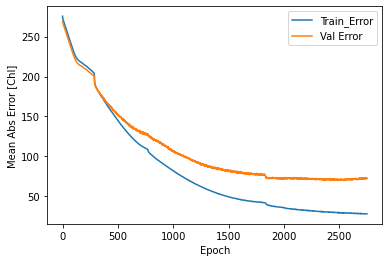

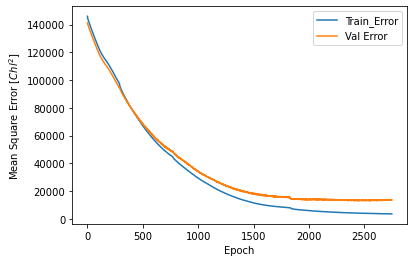

In [303]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Chl]')
    plt.plot(hist['epoch'], hist['mae'],
            label='Train_Error')
    plt.plot(hist['epoch'], hist['val_mae'],
            label='Val Error')
    plt.legend()
   # plt.ylim([0,20])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Chl^2$]')
    plt.plot(hist['epoch'], hist['mse'],
            label='Train_Error')
    plt.plot(hist['epoch'], hist['val_mse'],
            label='Val Error')
    plt.legend()
    #plt.ylim([0,100])
    
plot_history(history)

In [304]:
loss, mae, mse = model.evaluate(scaled_test_rand, test_labels_rand, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} Chlorophyll".format(mae))

Testing set Mean Abs Error: 72.27 Chlorophyll


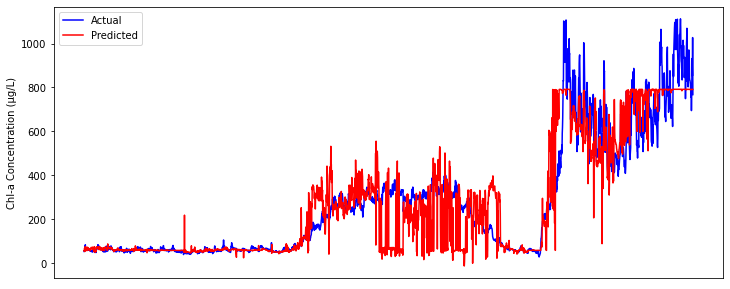

In [305]:
yhat = pd.DataFrame(model.predict(scaled_test_rand))
y_actual = pd.DataFrame(test_labels_rand)

plt.figure(figsize=(12,5))
#plt.xlabel('Actual vs Predicted Chl-a')
#plt.xticks(predicted_y, predicted_y.index.values)

plt.ylabel('Chl-a Concentration (µg/L)')

plt.plot(y_actual, color='blue', label = 'Actual')

plt.plot(yhat, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.xlabel('February to March')
plt.legend()
plt.show()

In [306]:
from math import sqrt
yhat = model.predict(scaled_test_rand)
yhat_trn = model.predict(scaled_train_rand)
# calculate RMSE
rmse = sqrt(mean_squared_error(test_labels_rand, yhat))
print('Test RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(train_labels_rand, yhat_trn))
print('Train RMSE: %.3f' % rmse)

print('Test R2 Score: ', r2_score(test_labels_rand, yhat))

print('Train R2 Score: ', r2_score(train_labels_rand, yhat_trn))

Test RMSE: 116.911
Train RMSE: 59.810
Test R2 Score:  0.801521219352402
Train R2 Score:  0.9490350826212799


In [ ]:
#Save Model for later use
#model.save('mlp_whole_dataset')
model2 = keras.models.load_model('mlp_whole_dataset')

yhat = pd.DataFrame(model2.predict(scaled_test_rand))
y_actual = pd.DataFrame(test_labels_rand)

plt.figure(figsize=(12,5))
#plt.xlabel('Actual vs Predicted Chl-a')
#plt.xticks(predicted_y, predicted_y.index.values)

plt.plot(y_actual, color='blue')
plt.plot(yhat, color='red')
plt.show()